In [52]:
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [53]:
plt.style.use('seaborn-ticks')  # Красивые графики
plt.rcParams['figure.figsize'] = (25, 12)  # Размер картинок
plt.rcParams['font.size'] = 20

In [54]:

data = pd.read_excel('Капельницы_АУ_ВУ_аналитический отчет_декабрь.xlsx', sheet_name='Sheet1')

In [56]:
data_new_all = data.groupby('Дата приема').agg({'Количество услуг': sum, 'Sum([Всего начислено])': sum})
data_new_au = data[data['АУ/ВУ'] == 'АУ'].groupby('Дата приема').agg({'Количество услуг': sum, 'Sum([Всего начислено])': sum})
data_new_vu = data[data['АУ/ВУ'] == 'ВУ'].groupby('Дата приема').agg({'Количество услуг': sum, 'Sum([Всего начислено])': sum})

In [57]:
data_new = data_new.sort_index()

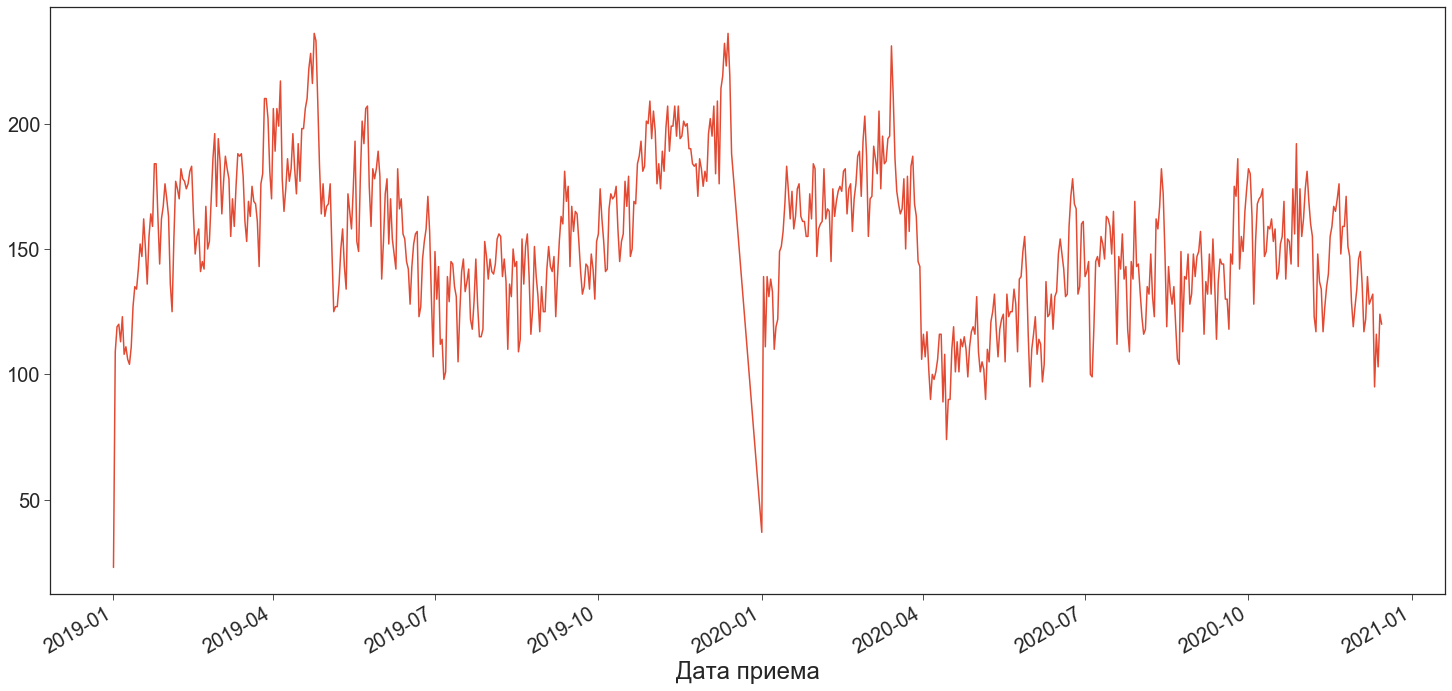

In [58]:
data_new['Sum([Количество])'].plot()

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


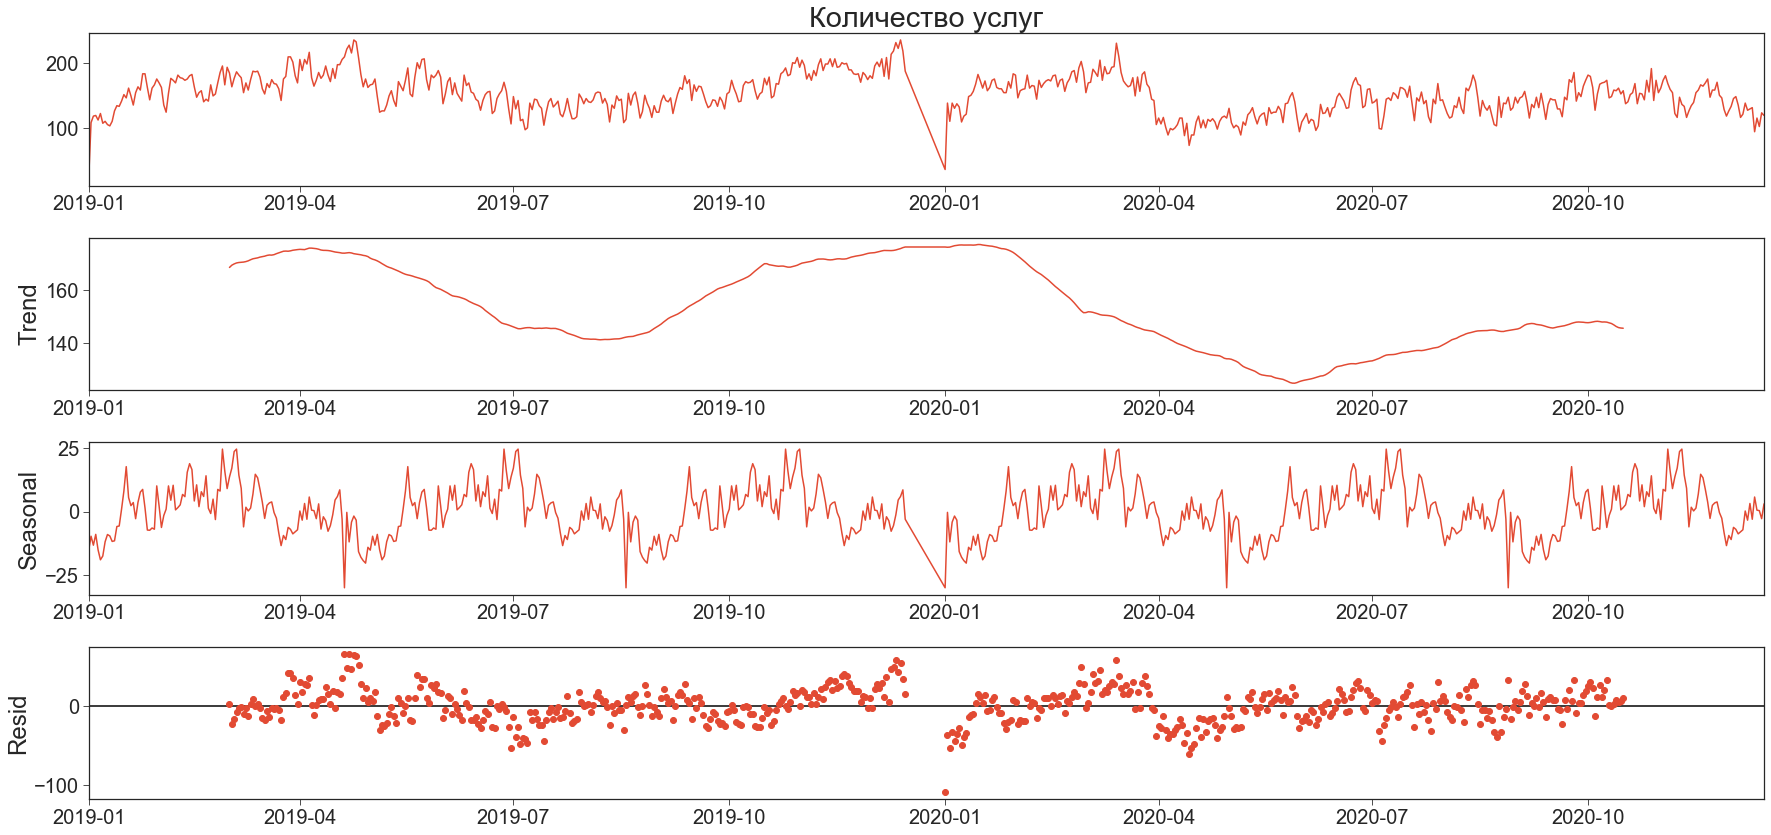

In [69]:
import statsmodels.api as sm


result = sm.tsa.seasonal_decompose(data_new_all['Количество услуг'], model='additive', freq=30*4)
result.plot()
plt.show()



C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


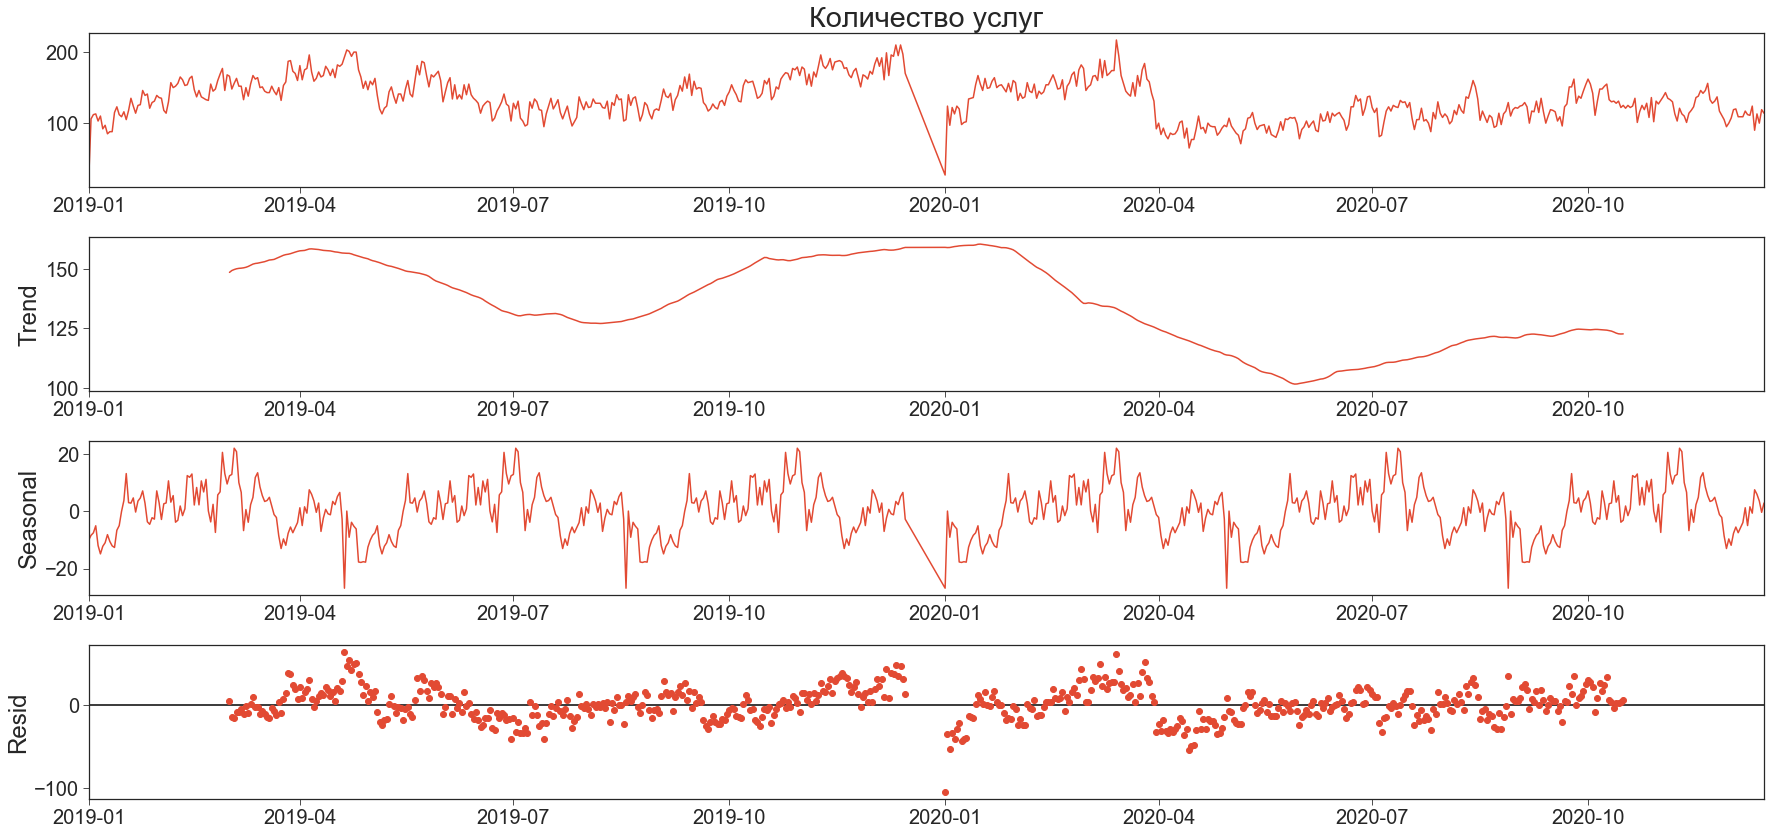

In [70]:
result = sm.tsa.seasonal_decompose(data_new_au['Количество услуг'], model='additive', freq=30*4)
result.plot()
plt.show()

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


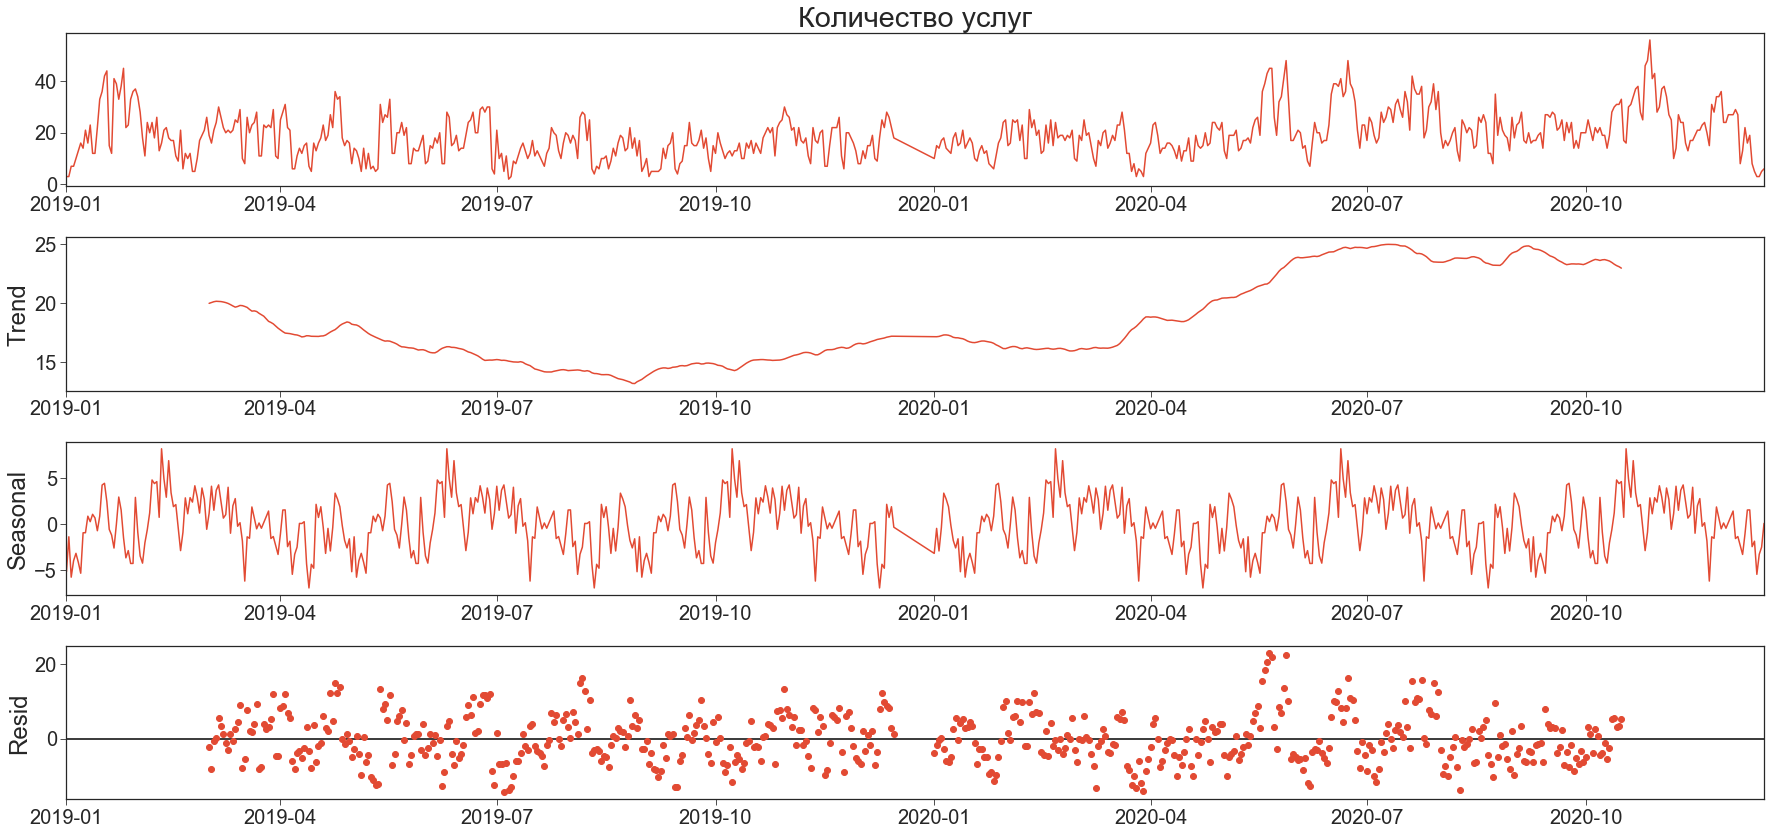

In [71]:
result = sm.tsa.seasonal_decompose(data_new_vu['Количество услуг'], model='additive', freq=30*4)
result.plot()
plt.show()

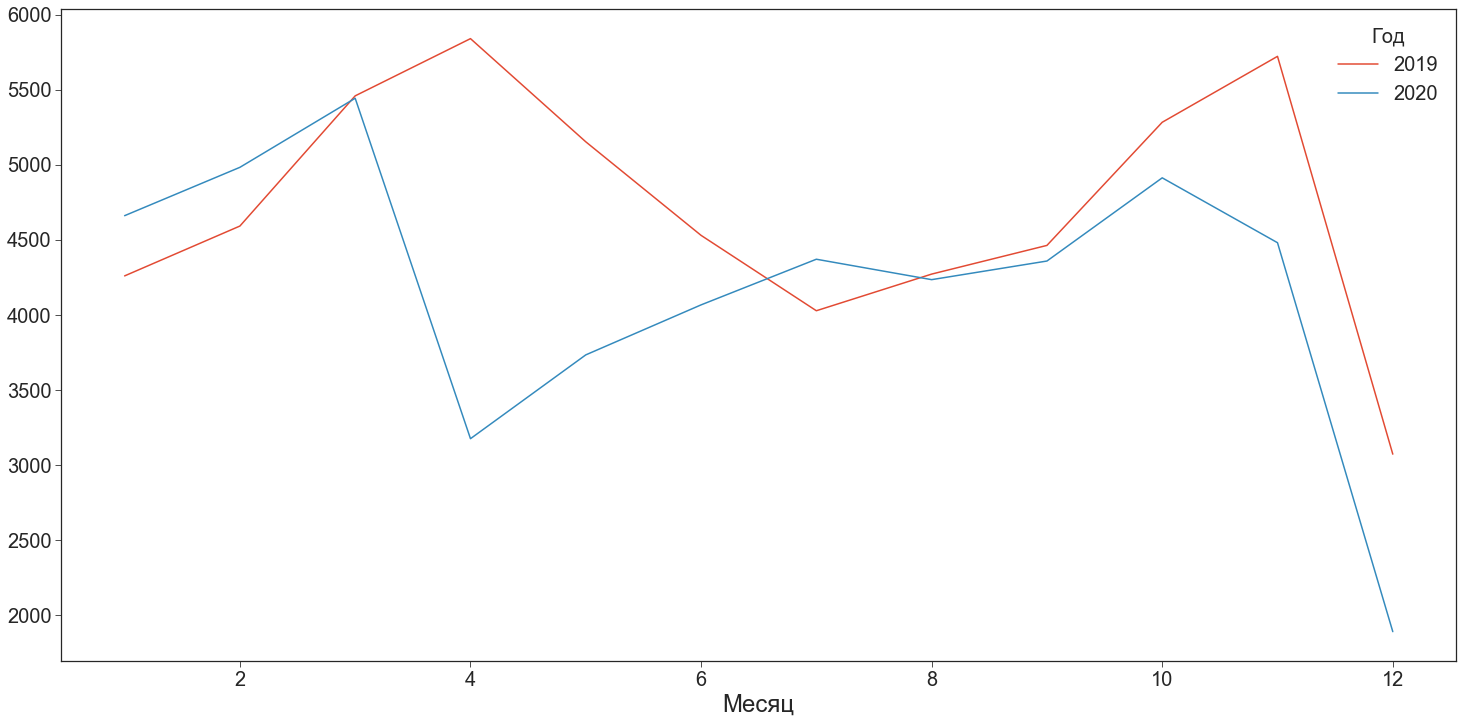

In [72]:
data_new_all['Год'] = data_new_all.index.year
data_new_all['Месяц'] = data_new_all.index.month
data_new_pivot = pd.pivot_table(data_new_all, values='Количество услуг', columns='Год', index='Месяц', aggfunc='sum')
data_new_pivot.plot()

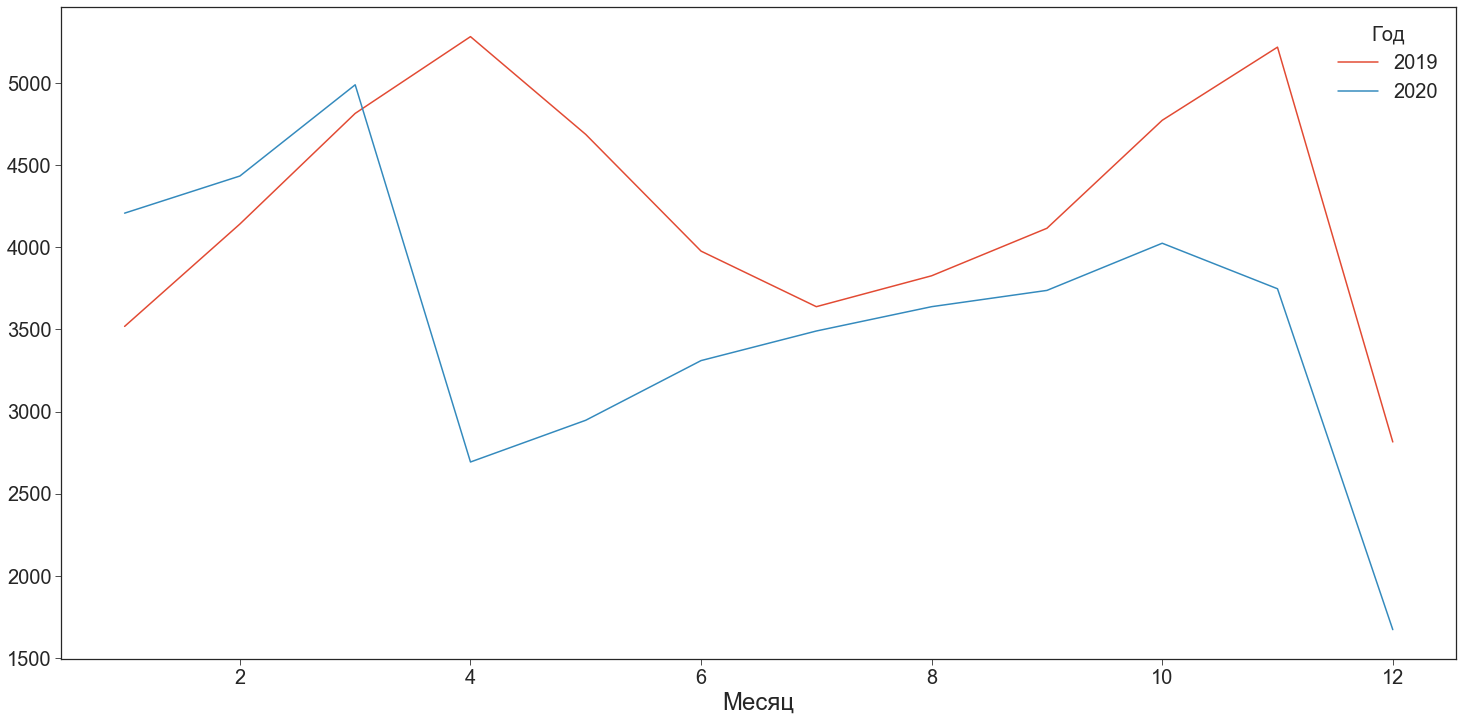

In [73]:
data_new_au['Год'] = data_new_au.index.year
data_new_au['Месяц'] = data_new_au.index.month
data_new_pivot = pd.pivot_table(data_new_au, values='Количество услуг', columns='Год', index='Месяц', aggfunc='sum')
data_new_pivot.plot()

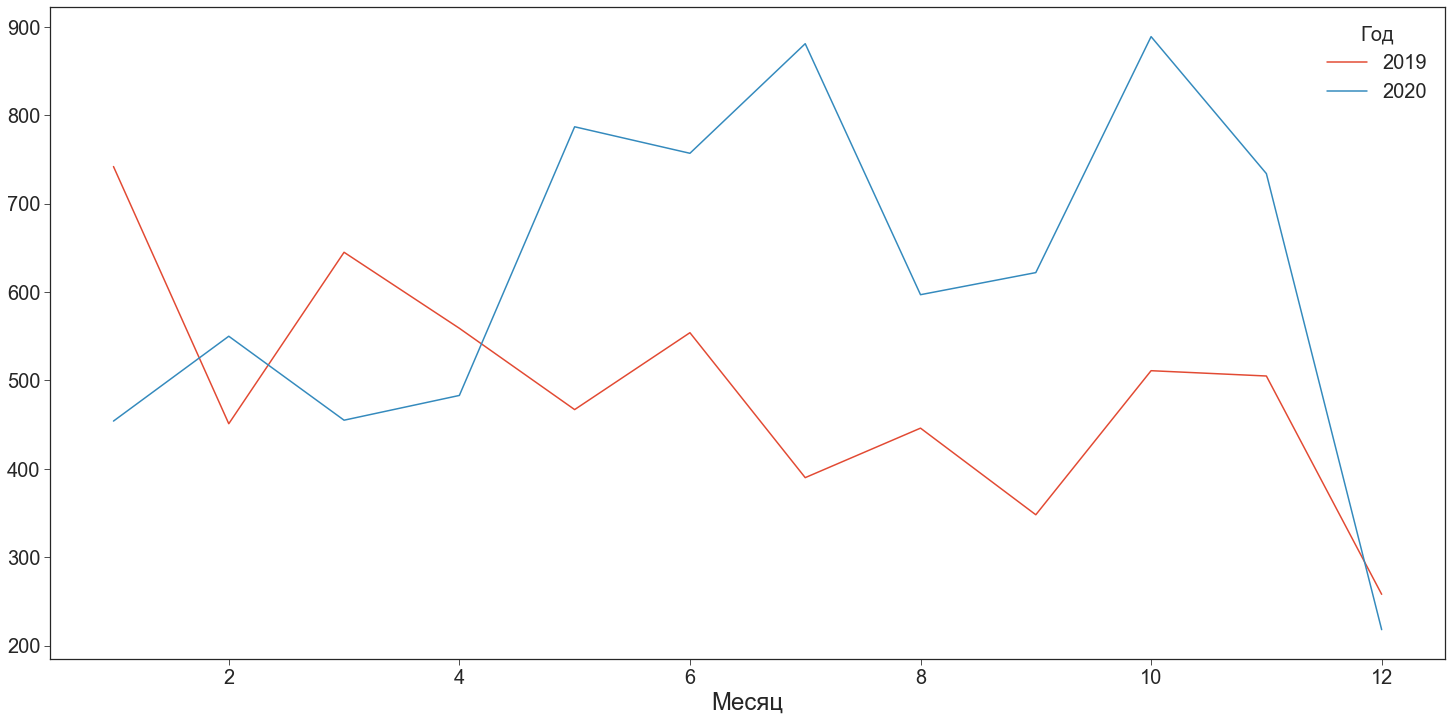

In [74]:
data_new_vu['Год'] = data_new_vu.index.year
data_new_vu['Месяц'] = data_new_vu.index.month
data_new_pivot = pd.pivot_table(data_new_vu, values='Количество услуг', columns='Год', index='Месяц', aggfunc='sum')
data_new_pivot.plot()

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


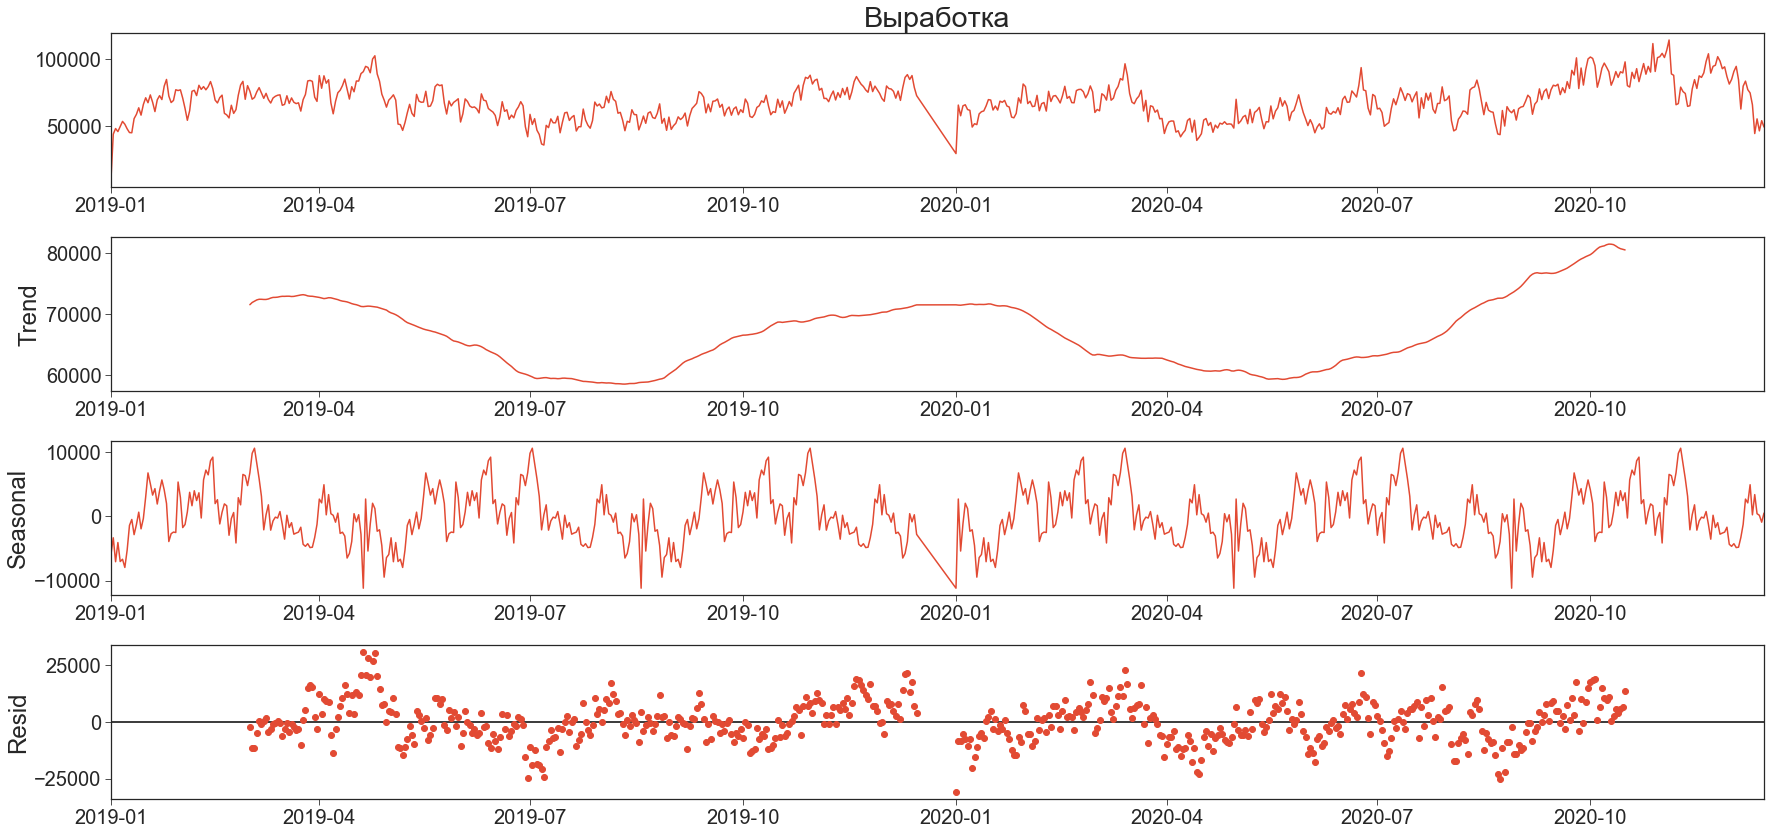

In [77]:
data_new_all = data_new_all.rename(columns={'Sum([Всего начислено])': 'Выработка'})

result_sum = sm.tsa.seasonal_decompose(data_new_all['Выработка'], model='additive', freq=30*4)
result_sum.plot()
plt.show()